In [1]:
# Air Quality Data - Initial Exploration
# This notebook provides the first look at your collected data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Setup plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("=" * 70)
print("AIR QUALITY DATA - INITIAL EXPLORATION")
print("=" * 70)

AIR QUALITY DATA - INITIAL EXPLORATION


In [2]:
# =============================================================================
# 1. LOAD DATA
# =============================================================================

print("\n📂 LOADING DATA...")
print("-" * 70)

# Define paths
data_dir = Path('../data/raw')

# List all CSV files
csv_files = list(data_dir.glob('*.csv'))
print(f"Found {len(csv_files)} CSV files:\n")
for f in csv_files:
    print(f"  - {f.name} ({f.stat().st_size / 1024:.1f} KB)")

# Load the most recent files
historical_files = [f for f in csv_files if 'historical' in f.name]
current_files = [f for f in csv_files if 'current' in f.name]

if historical_files:
    df_historical = pd.read_csv(sorted(historical_files)[-1])
    print(f"\n✓ Loaded historical data: {len(df_historical):,} rows")
else:
    df_historical = pd.DataFrame()
    print("\n✗ No historical data found")

if current_files:
    df_current = pd.read_csv(sorted(current_files)[-1])
    print(f"✓ Loaded current data: {len(df_current):,} rows")
else:
    df_current = pd.DataFrame()
    print("✗ No current data found")

# Combine datasets
if not df_historical.empty and not df_current.empty:
    df = pd.concat([df_historical, df_current], ignore_index=True)
elif not df_historical.empty:
    df = df_historical.copy()
elif not df_current.empty:
    df = df_current.copy()
else:
    raise ValueError("No data files found!")

print(f"\n📊 Total combined data: {len(df):,} rows")


📂 LOADING DATA...
----------------------------------------------------------------------
Found 2 CSV files:

  - air_quality_current_20251129_174603.csv (15.0 KB)
  - air_quality_historical_20251129.csv (2857.3 KB)

✓ Loaded historical data: 22,556 rows
✓ Loaded current data: 115 rows

📊 Total combined data: 22,671 rows


In [3]:
# =============================================================================
# 2. BASIC DATA INFO
# =============================================================================

print("\n" + "=" * 70)
print("📋 DATASET OVERVIEW")
print("=" * 70)

print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 Column Information:")
print("-" * 70)
df.info()

print("\n📊 First Few Rows:")
print("-" * 70)
display(df.head())

print("\n📊 Last Few Rows:")
print("-" * 70)
display(df.tail())


📋 DATASET OVERVIEW

Shape: 22,671 rows × 22 columns
Memory usage: 9.79 MB

📊 Column Information:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22671 entries, 0 to 22670
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       22671 non-null  object 
 1   source          22671 non-null  object 
 2   aqi             22671 non-null  float64
 3   pm25            22671 non-null  float64
 4   pm10            22671 non-null  float64
 5   no2             22671 non-null  float64
 6   so2             22671 non-null  float64
 7   o3              22671 non-null  float64
 8   co              22671 non-null  float64
 9   temperature     22671 non-null  float64
 10  humidity        22671 non-null  float64
 11  pressure        22671 non-null  float64
 12  wind_speed      22671 non-null  float64
 13  wind_direction  22671 non-null  float64
 1

,timestamp,source,aqi,pm25,pm10,no2,so2,o3,co,temperature,humidity,pressure,wind_speed,wind_direction,location,city,country,state,latitude,longitude,city_name,country_code
0,2025-08-31 18:00:00,openweather,2.0,22.87,24.77,11.46,0.95,36.79,521.92,23.0,31.0,1014.0,2.57,290.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
1,2025-08-31 19:00:00,openweather,2.0,23.06,25.62,13.64,1.10,28.96,545.26,23.0,31.0,1014.0,2.57,290.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
2,2025-08-31 20:00:00,openweather,2.0,23.39,26.48,14.96,1.18,23.53,563.93,23.0,31.0,1014.0,2.57,290.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
3,2025-08-31 21:00:00,openweather,2.0,23.24,26.46,15.39,1.17,20.01,568.57,23.0,31.0,1014.0,2.57,290.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
4,2025-08-31 22:00:00,openweather,2.0,22.71,25.88,15.31,1.12,17.83,569.29,23.0,31.0,1014.0,2.57,290.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN



📊 Last Few Rows:
----------------------------------------------------------------------


,timestamp,source,aqi,pm25,pm10,no2,so2,o3,co,temperature,humidity,pressure,wind_speed,wind_direction,location,city,country,state,latitude,longitude,city_name,country_code
22666,2025-12-03 12:00:00,openweather,5.0,101.78,127.02,4.24,10.56,152.31,526.25,3.0,55.0,1013.0,0.5,330.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
22667,2025-12-03 13:00:00,openweather,5.0,83.36,108.33,2.64,9.17,156.41,421.03,3.0,55.0,1013.0,0.5,330.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
22668,2025-12-03 14:00:00,openweather,5.0,77.27,100.84,2.39,8.50,157.96,388.36,3.0,55.0,1013.0,0.5,330.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
22669,2025-12-03 15:00:00,openweather,5.0,77.59,99.54,4.34,8.15,151.60,410.65,3.0,55.0,1013.0,0.5,330.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN
22670,2025-12-03 16:00:00,openweather,5.0,82.61,103.18,8.82,7.76,136.94,472.49,3.0,55.0,1013.0,0.5,330.0,NaN,NaN,NaN,NaN,28.7041,77.1025,Delhi,IN


In [4]:
# =============================================================================
# 3. DATA TYPES AND CONVERSION
# =============================================================================

print("\n" + "=" * 70)
print("🔧 DATA TYPE CONVERSION")
print("=" * 70)

# Convert timestamp to datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    print("✓ Converted timestamp to datetime")

# Convert numeric columns
numeric_cols = ['aqi', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co', 
                'temperature', 'humidity', 'pressure', 'wind_speed']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"✓ Converted {len([c for c in numeric_cols if c in df.columns])} numeric columns")


🔧 DATA TYPE CONVERSION
✓ Converted timestamp to datetime
✓ Converted 11 numeric columns



🔍 MISSING DATA ANALYSIS

Missing values by column:
----------------------------------------------------------------------


,Missing Count,Missing %
location,22671,100.00
country,22660,99.95
state,22660,99.95
city,22642,99.87


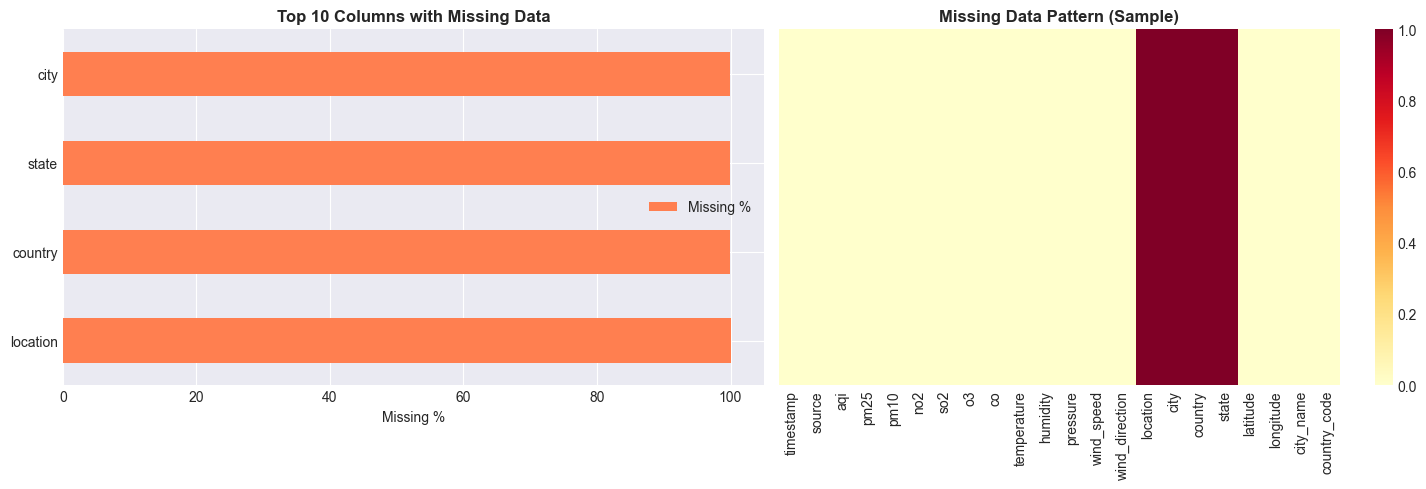

In [5]:
# =============================================================================
# 4. MISSING DATA ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("🔍 MISSING DATA ANALYSIS")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print("\nMissing values by column:")
print("-" * 70)
display(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
missing_df[missing_df['Missing Count'] > 0].head(10).plot(
    y='Missing %', 
    kind='barh', 
    ax=axes[0],
    color='coral'
)
axes[0].set_title('Top 10 Columns with Missing Data', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Missing %')

# Heatmap
if len(df) < 10000:
    sample_df = df
else:
    sample_df = df.sample(5000)
    
sns.heatmap(sample_df.isnull(), 
            cbar=True, 
            yticklabels=False,
            cmap='YlOrRd',
            ax=axes[1])
axes[1].set_title('Missing Data Pattern (Sample)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


📅 TIME RANGE ANALYSIS

Earliest record: 2025-08-31 18:00:00
Latest record:   2025-12-03 16:00:00
Time span:       93 days

Records per day:
  Mean:   238.6
  Median: 240.0
  Min:    60
  Max:    296


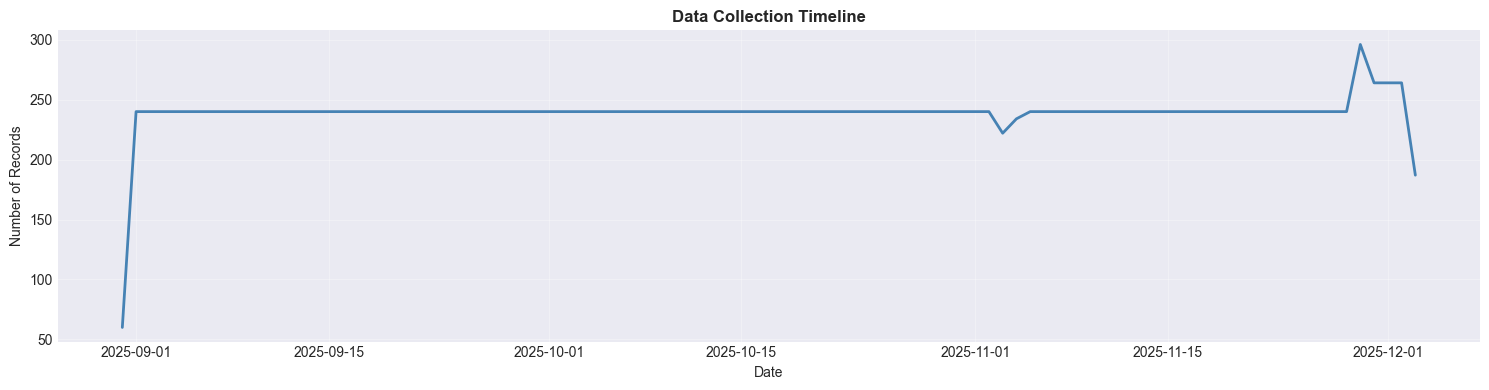

In [6]:
# =============================================================================
# 5. TIME RANGE ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("📅 TIME RANGE ANALYSIS")
print("=" * 70)

if 'timestamp' in df.columns:
    print(f"\nEarliest record: {df['timestamp'].min()}")
    print(f"Latest record:   {df['timestamp'].max()}")
    print(f"Time span:       {(df['timestamp'].max() - df['timestamp'].min()).days} days")
    
    # Records per day
    df['date'] = df['timestamp'].dt.date
    records_per_day = df.groupby('date').size()
    
    print(f"\nRecords per day:")
    print(f"  Mean:   {records_per_day.mean():.1f}")
    print(f"  Median: {records_per_day.median():.1f}")
    print(f"  Min:    {records_per_day.min()}")
    print(f"  Max:    {records_per_day.max()}")
    
    # Plot timeline
    fig, ax = plt.subplots(figsize=(15, 4))
    records_per_day.plot(ax=ax, color='steelblue', linewidth=2)
    ax.set_title('Data Collection Timeline', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Records')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


🌍 GEOGRAPHIC COVERAGE

Data by city:
----------------------------------------------------------------------


city_name
Delhi          2357
Beijing        2260
Cairo          2260
London         2260
New York       2260
São Paulo      2260
Mexico City    2260
Mumbai         2259
Tokyo          2259
Los Angeles    2236
Name: count, dtype: int64

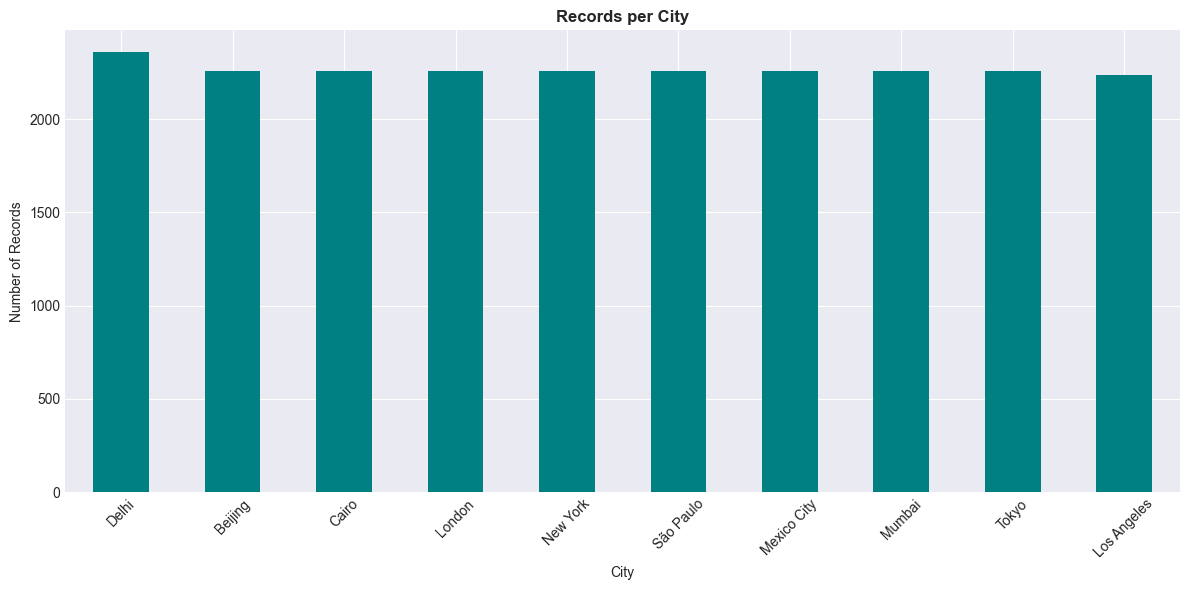


Data by country:
----------------------------------------------------------------------


country_code
IN    4616
US    4496
CN    2260
GB    2260
BR    2260
MX    2260
EG    2260
JP    2259
Name: count, dtype: int64

In [7]:
# =============================================================================
# 6. GEOGRAPHIC COVERAGE
# =============================================================================

print("\n" + "=" * 70)
print("🌍 GEOGRAPHIC COVERAGE")
print("=" * 70)

if 'city_name' in df.columns:
    city_counts = df['city_name'].value_counts()
    print(f"\nData by city:")
    print("-" * 70)
    display(city_counts)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    city_counts.plot(kind='bar', ax=ax, color='teal')
    ax.set_title('Records per City', fontsize=12, fontweight='bold')
    ax.set_xlabel('City')
    ax.set_ylabel('Number of Records')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

if 'country_code' in df.columns:
    country_counts = df['country_code'].value_counts()
    print(f"\nData by country:")
    print("-" * 70)
    display(country_counts)


📡 DATA SOURCE ANALYSIS

Records by source:
----------------------------------------------------------------------


source
openweather    22642
waqi              18
iqair             11
Name: count, dtype: int64

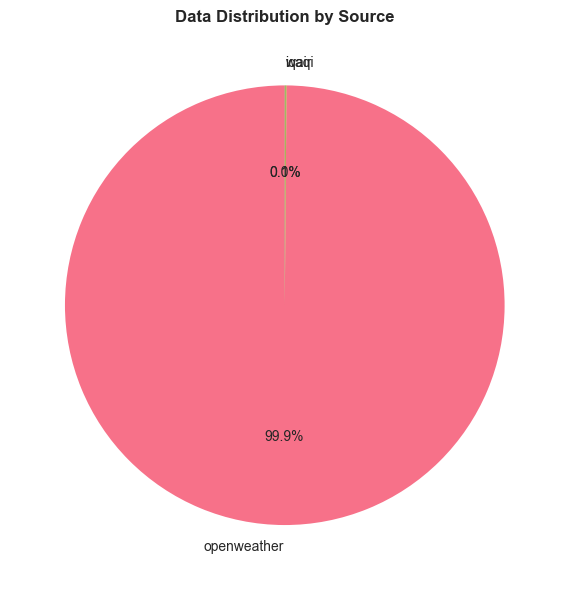

In [8]:
# =============================================================================
# 7. DATA SOURCE ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("📡 DATA SOURCE ANALYSIS")
print("=" * 70)

if 'source' in df.columns:
    source_counts = df['source'].value_counts()
    print("\nRecords by source:")
    print("-" * 70)
    display(source_counts)
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    source_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title('Data Distribution by Source', fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()


In [9]:
# =============================================================================
# 8. DESCRIPTIVE STATISTICS
# =============================================================================

print("\n" + "=" * 70)
print("📊 DESCRIPTIVE STATISTICS - AIR QUALITY METRICS")
print("=" * 70)

air_quality_cols = ['aqi', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'co']
aq_stats = df[air_quality_cols].describe()
display(aq_stats)

print("\n📊 DESCRIPTIVE STATISTICS - WEATHER METRICS")
print("=" * 70)

weather_cols = ['temperature', 'humidity', 'pressure', 'wind_speed']
weather_stats = df[weather_cols].describe()
display(weather_stats)



📊 DESCRIPTIVE STATISTICS - AIR QUALITY METRICS


,aqi,pm25,pm10,no2,so2,o3,co
count,22671.000000,22671.000000,22671.000000,22671.000000,22671.000000,22671.000000,22671.000000
mean,2.624234,29.486244,43.690529,9.175416,5.627833,70.884429,256.370785
std,3.706358,48.827942,63.372831,16.008303,10.187087,36.075900,311.037852
min,1.000000,0.500000,0.500000,0.030000,0.050000,0.000000,2.000000
25%,2.000000,3.320000,6.660000,1.040000,0.710000,46.200000,105.930000
50%,2.000000,9.430000,16.970000,3.670000,2.120000,71.490000,138.790000
75%,3.000000,28.815000,53.105000,9.110000,6.385000,90.040000,288.650000
max,201.000000,482.430000,853.990000,145.790000,205.530000,254.950000,3647.480000



📊 DESCRIPTIVE STATISTICS - WEATHER METRICS


,temperature,humidity,pressure,wind_speed
count,22671.000000,22671.000000,22671.000000,22671.000000
mean,15.278352,57.253529,1017.286603,3.470932
std,10.235102,23.260825,9.760734,3.999622
min,-17.700000,28.000000,987.900000,0.200000
25%,8.000000,33.000000,1014.000000,2.000000
50%,11.100000,58.600000,1014.000000,2.570000
75%,25.000000,87.000000,1025.100000,3.600000
max,31.000000,93.000000,1036.700000,44.340000



📈 DISTRIBUTION ANALYSIS


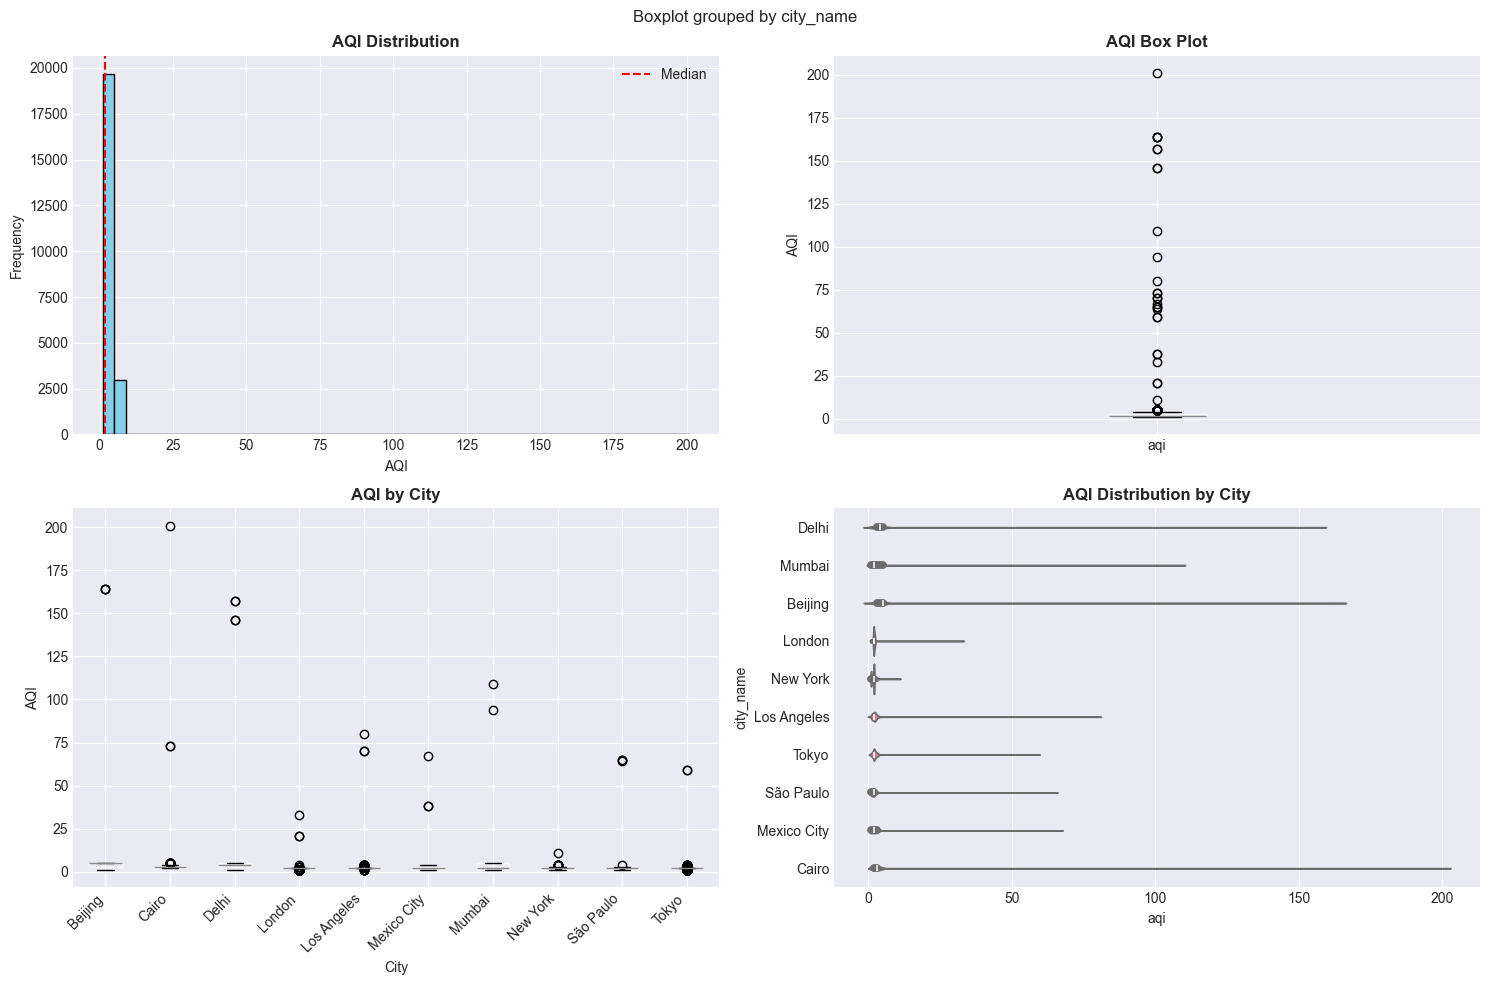

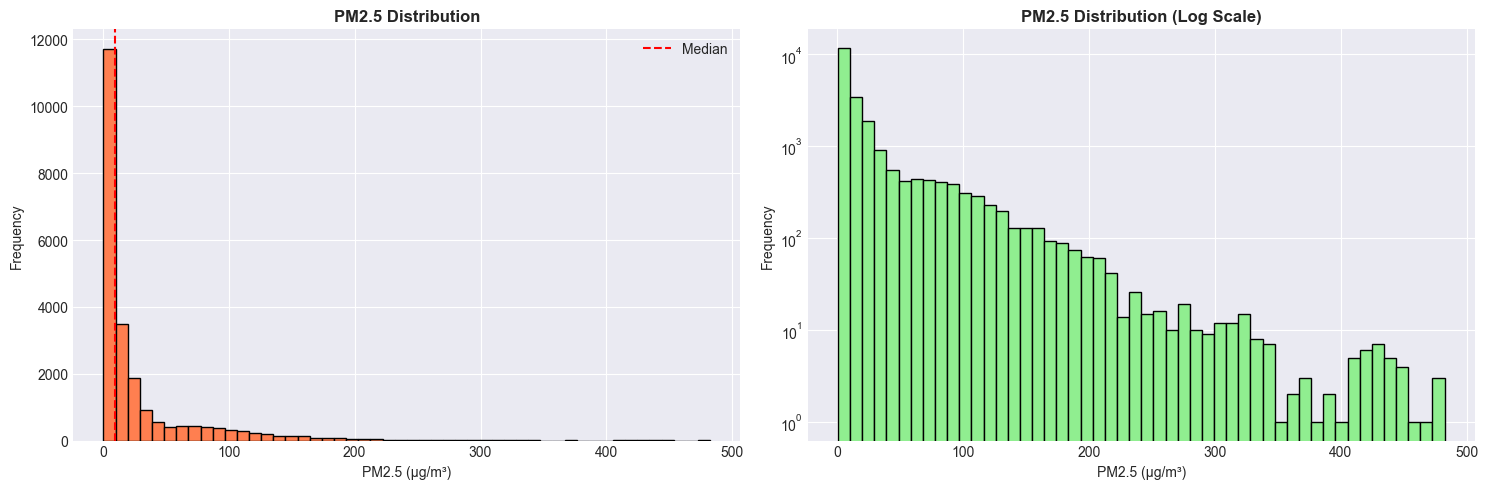

In [10]:
# =============================================================================
# 9. DISTRIBUTION PLOTS
# =============================================================================

print("\n" + "=" * 70)
print("📈 DISTRIBUTION ANALYSIS")
print("=" * 70)

# AQI Distribution
if 'aqi' in df.columns and df['aqi'].notna().sum() > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram
    df['aqi'].dropna().hist(bins=50, ax=axes[0, 0], color='skyblue', edgecolor='black')
    axes[0, 0].set_title('AQI Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('AQI')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df['aqi'].median(), color='red', linestyle='--', label='Median')
    axes[0, 0].legend()
    
    # Box plot
    df.boxplot(column='aqi', ax=axes[0, 1])
    axes[0, 1].set_title('AQI Box Plot', fontweight='bold')
    axes[0, 1].set_ylabel('AQI')
    
    # By city
    if 'city_name' in df.columns:
        df.boxplot(column='aqi', by='city_name', ax=axes[1, 0], rot=45)
        axes[1, 0].set_title('AQI by City', fontweight='bold')
        axes[1, 0].set_xlabel('City')
        axes[1, 0].set_ylabel('AQI')
        plt.sca(axes[1, 0])
        plt.xticks(rotation=45, ha='right')
    
    # Violin plot
    if 'city_name' in df.columns and df['city_name'].nunique() <= 15:
        sns.violinplot(data=df, y='city_name', x='aqi', ax=axes[1, 1])
        axes[1, 1].set_title('AQI Distribution by City', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# PM2.5 Distribution
if 'pm25' in df.columns and df['pm25'].notna().sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    df['pm25'].dropna().hist(bins=50, ax=axes[0], color='coral', edgecolor='black')
    axes[0].set_title('PM2.5 Distribution', fontweight='bold')
    axes[0].set_xlabel('PM2.5 (µg/m³)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(df['pm25'].median(), color='red', linestyle='--', label='Median')
    axes[0].legend()
    
    # Log scale
    df['pm25'].dropna()[df['pm25'] > 0].hist(bins=50, ax=axes[1], 
                                               color='lightgreen', edgecolor='black')
    axes[1].set_title('PM2.5 Distribution (Log Scale)', fontweight='bold')
    axes[1].set_xlabel('PM2.5 (µg/m³)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_yscale('log')
    
    plt.tight_layout()
    plt.show()


🔗 CORRELATION ANALYSIS


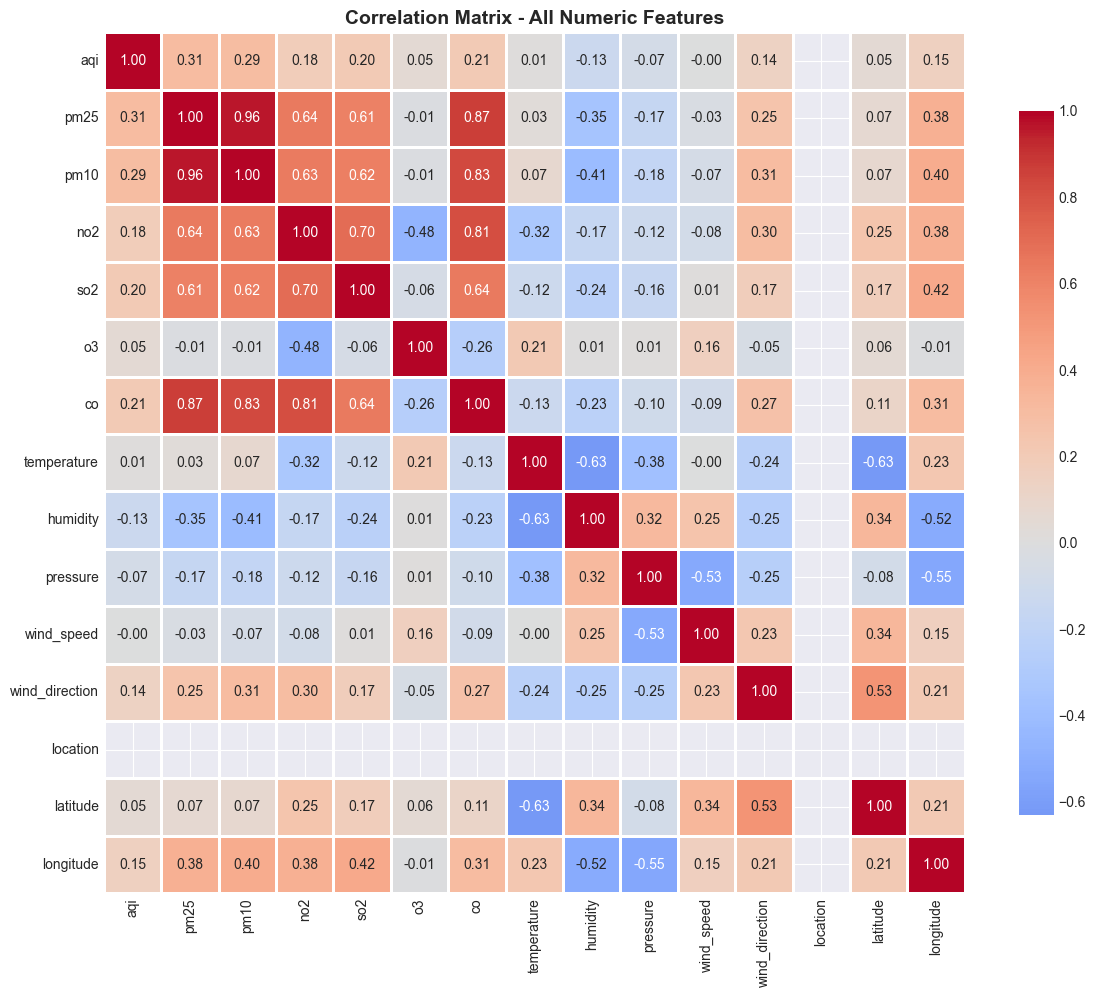


Top correlations with AQI:
----------------------------------------------------------------------


pm25              0.306611
pm10              0.294733
co                0.209195
so2               0.204577
no2               0.184831
longitude         0.149164
wind_direction    0.137768
latitude          0.053397
o3                0.051330
temperature       0.011941
wind_speed       -0.001238
pressure         -0.072816
humidity         -0.126756
location               NaN
Name: aqi, dtype: float64

In [11]:
# =============================================================================
# 10. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("🔗 CORRELATION ANALYSIS")
print("=" * 70)

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Correlation Matrix - All Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with AQI
if 'aqi' in correlation_matrix.columns:
    print("\nTop correlations with AQI:")
    print("-" * 70)
    aqi_corr = correlation_matrix['aqi'].sort_values(ascending=False)
    display(aqi_corr[aqi_corr.index != 'aqi'])

In [12]:
# =============================================================================
# 11. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 70)
print("✅ DATA QUALITY SUMMARY")
print("=" * 70)

quality_report = {
    'Total Records': len(df),
    'Complete Records': df.dropna().shape[0],
    'Completeness %': round(df.dropna().shape[0] / len(df) * 100, 2),
    'Duplicate Records': df.duplicated().sum(),
    'Date Range (days)': (df['timestamp'].max() - df['timestamp'].min()).days if 'timestamp' in df.columns else 'N/A',
    'Cities Covered': df['city_name'].nunique() if 'city_name' in df.columns else 'N/A',
    'Data Sources': df['source'].nunique() if 'source' in df.columns else 'N/A',
}

print("\n📊 Quality Metrics:")
print("-" * 70)
for key, value in quality_report.items():
    print(f"{key:.<40} {value}")


✅ DATA QUALITY SUMMARY

📊 Quality Metrics:
----------------------------------------------------------------------
Total Records........................... 22671
Complete Records........................ 0
Completeness %.......................... 0.0
Duplicate Records....................... 0
Date Range (days)....................... 93
Cities Covered.......................... 10
Data Sources............................ 3


In [13]:
# =============================================================================
# 12. KEY INSIGHTS
# =============================================================================

print("\n" + "=" * 70)
print("💡 KEY INSIGHTS")
print("=" * 70)

insights = []

# AQI insights
if 'aqi' in df.columns and df['aqi'].notna().sum() > 0:
    mean_aqi = df['aqi'].mean()
    if mean_aqi > 150:
        insights.append(f"⚠️  Average AQI is {mean_aqi:.1f} - Unhealthy levels detected!")
    elif mean_aqi > 100:
        insights.append(f"⚠️  Average AQI is {mean_aqi:.1f} - Unhealthy for sensitive groups")
    else:
        insights.append(f"✓ Average AQI is {mean_aqi:.1f} - Generally acceptable")

# Missing data insights
missing_pct_overall = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
if missing_pct_overall > 30:
    insights.append(f"⚠️  High missing data rate: {missing_pct_overall:.1f}%")
elif missing_pct_overall > 10:
    insights.append(f"ℹ️  Moderate missing data: {missing_pct_overall:.1f}%")
else:
    insights.append(f"✓ Low missing data: {missing_pct_overall:.1f}%")

# City coverage
if 'city_name' in df.columns:
    city_count = df['city_name'].nunique()
    insights.append(f"✓ Data collected from {city_count} cities")

# Time coverage
if 'timestamp' in df.columns:
    days = (df['timestamp'].max() - df['timestamp'].min()).days
    insights.append(f"✓ {days} days of historical data collected")

print("\n")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")



💡 KEY INSIGHTS


1. ✓ Average AQI is 2.6 - Generally acceptable
2. ℹ️  Moderate missing data: 17.4%
3. ✓ Data collected from 10 cities
4. ✓ 93 days of historical data collected


In [14]:
# =============================================================================
# SAVE SUMMARY
# =============================================================================

print("\n" + "=" * 70)
print("💾 SAVING ANALYSIS SUMMARY")
print("=" * 70)

# Save quality report
summary_df = pd.DataFrame([quality_report])
summary_df.to_csv('../data/processed/data_quality_report.csv', index=False)
print("✓ Saved: data_quality_report.csv")

# Save cleaned data preview
df.head(1000).to_csv('../data/processed/data_preview.csv', index=False)
print("✓ Saved: data_preview.csv (first 1000 rows)")

print("\n" + "=" * 70)
print("✅ INITIAL EXPLORATION COMPLETE!")
print("=" * 70)
print("\nNext steps:")
print("1. Review the visualizations and insights")
print("2. Proceed to detailed EDA notebook")
print("3. Start feature engineering")


💾 SAVING ANALYSIS SUMMARY
✓ Saved: data_quality_report.csv
✓ Saved: data_preview.csv (first 1000 rows)

✅ INITIAL EXPLORATION COMPLETE!

Next steps:
1. Review the visualizations and insights
2. Proceed to detailed EDA notebook
3. Start feature engineering
